In [1]:
# base libraries
import warnings; warnings.simplefilter('ignore')
import os
import sys

# external libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display_javascript, display_html, display

# local libraries
sys.path.append(os.path.abspath("../"))
import readme_utils

matplotlib.rcParams['svg.fonttype'] = 'none'
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
sns.set_palette('deep')

# Load baseline data for the Benchmark

In [2]:
info = readme_utils.io.load_benchmark_info( "_info.yaml" )
readme_utils.plot.show_info( info )

Benchmark 
 
 
 ID 
 CATH 
 # motifs 
 
 
 T05 
 CATH.3.10.20.30 
 1 
 
 
 Structures 
 
 
 Query 
 Reference 
 
 
 2pkoA.pdb 
 2q5wD.pdb 
 
 
 Design 
 
 
 motif 
 chain 
 sequence shift 
 
 
 49-64 
 A 
 1 
 
 
 Experiments 
 abinitio 
 FunFolDes 
 
 
 Fragment types 
 
 
 sequence-based 
 Standard Rosetta fragment generation (sequence-based data) 
 
 
 structure-based 
 Automatic fragment generation (secondary structure + angles + sasa)

In [3]:
base = readme_utils.io.load_baseline(info)
base

,score,lbl_CORE,lbl_PICKED,lbl_MOTIF,lbl_QUERY,sequence_A,structure_A,lbl_CONTACTS
0,-130.176,[A],[A],[A],[A],MVNVKVEFLGGLDAIFGKQRVHKIKMDKEDPVTVGDLIDHIVSTMINNPNDVSIFIEDDSIRPGIITLINDTDWELEGEKDYILEDGDIISFTS,LEEEEEEEELLHHHHLLLLLEEEEEELLLLLLEHHHHHHHHHHHLLLLHHHHHHHELLLLELLLLEEEELLEEHHHLLHHHLELLLLLEEEEEL,"8,11-12,14-17,34-35,38-39,41-43,45-48,65-67,74,79-80,92-94"


# Fragment analysis

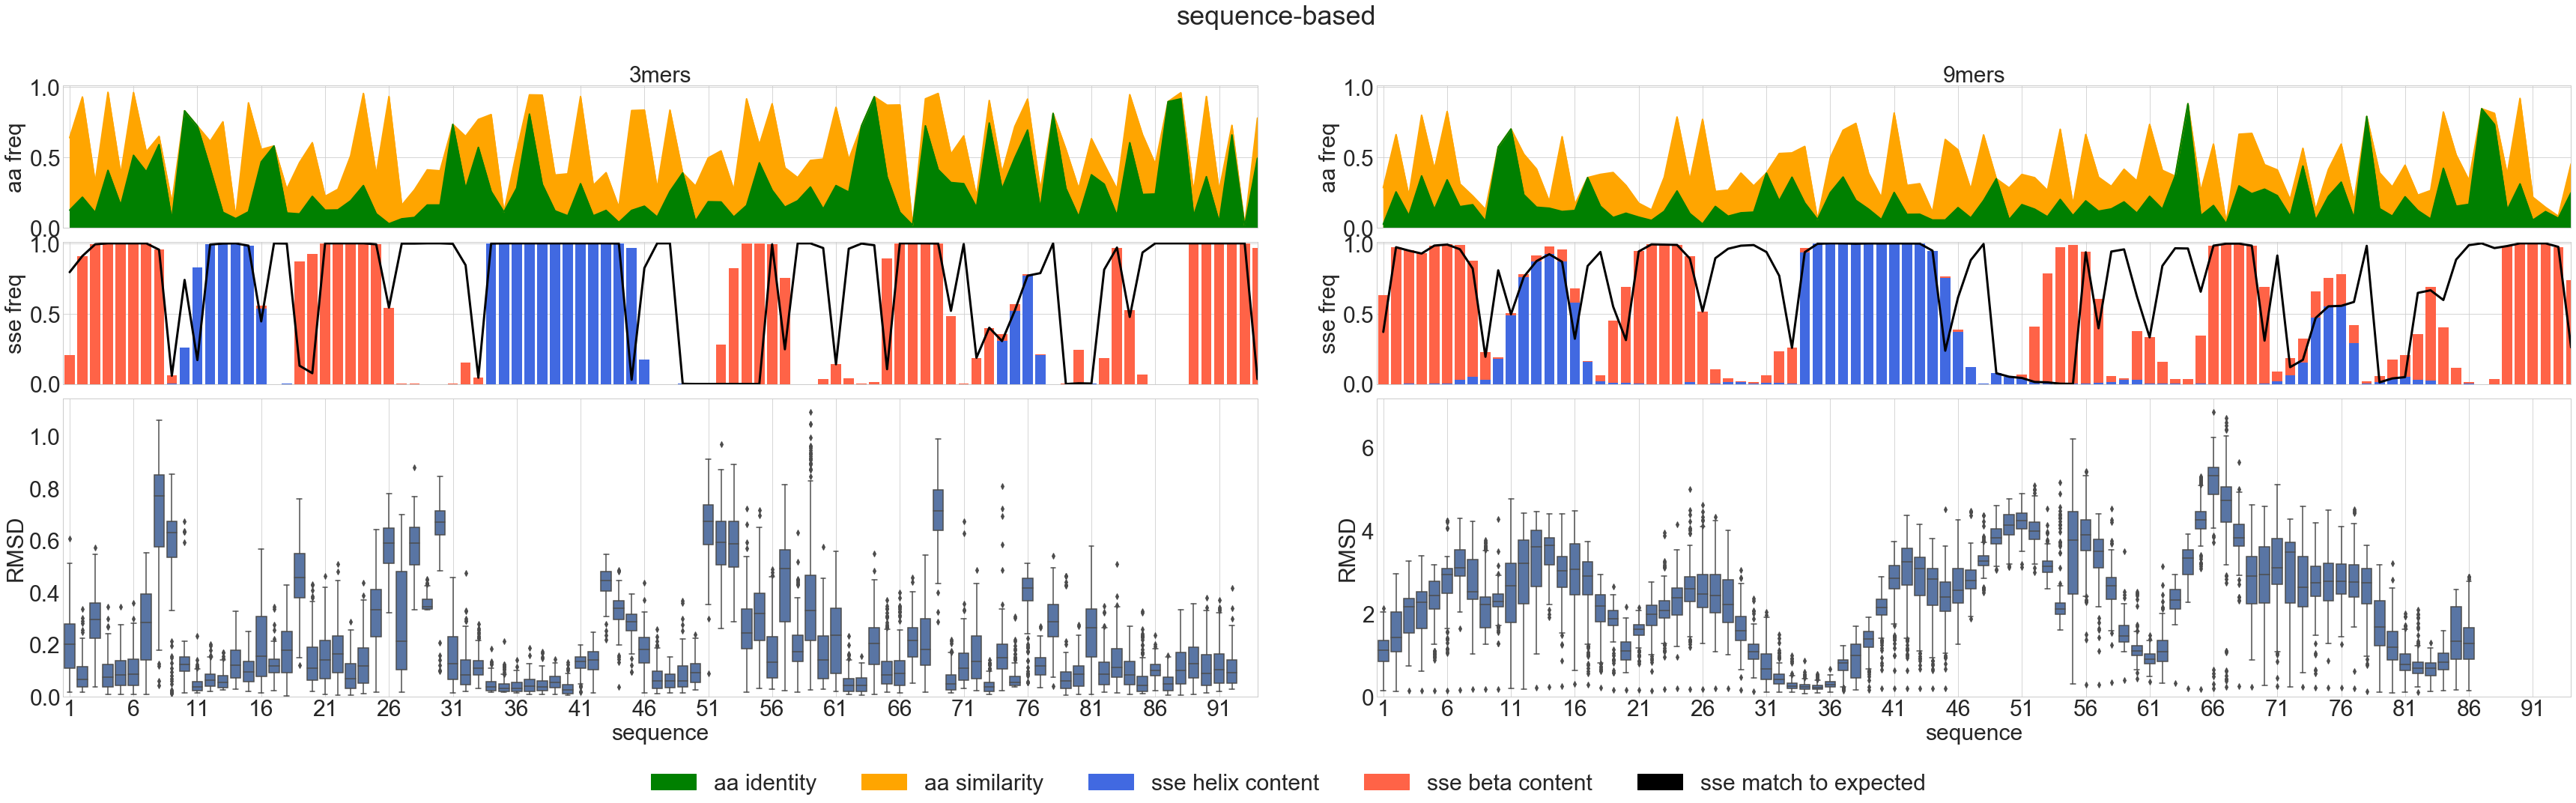

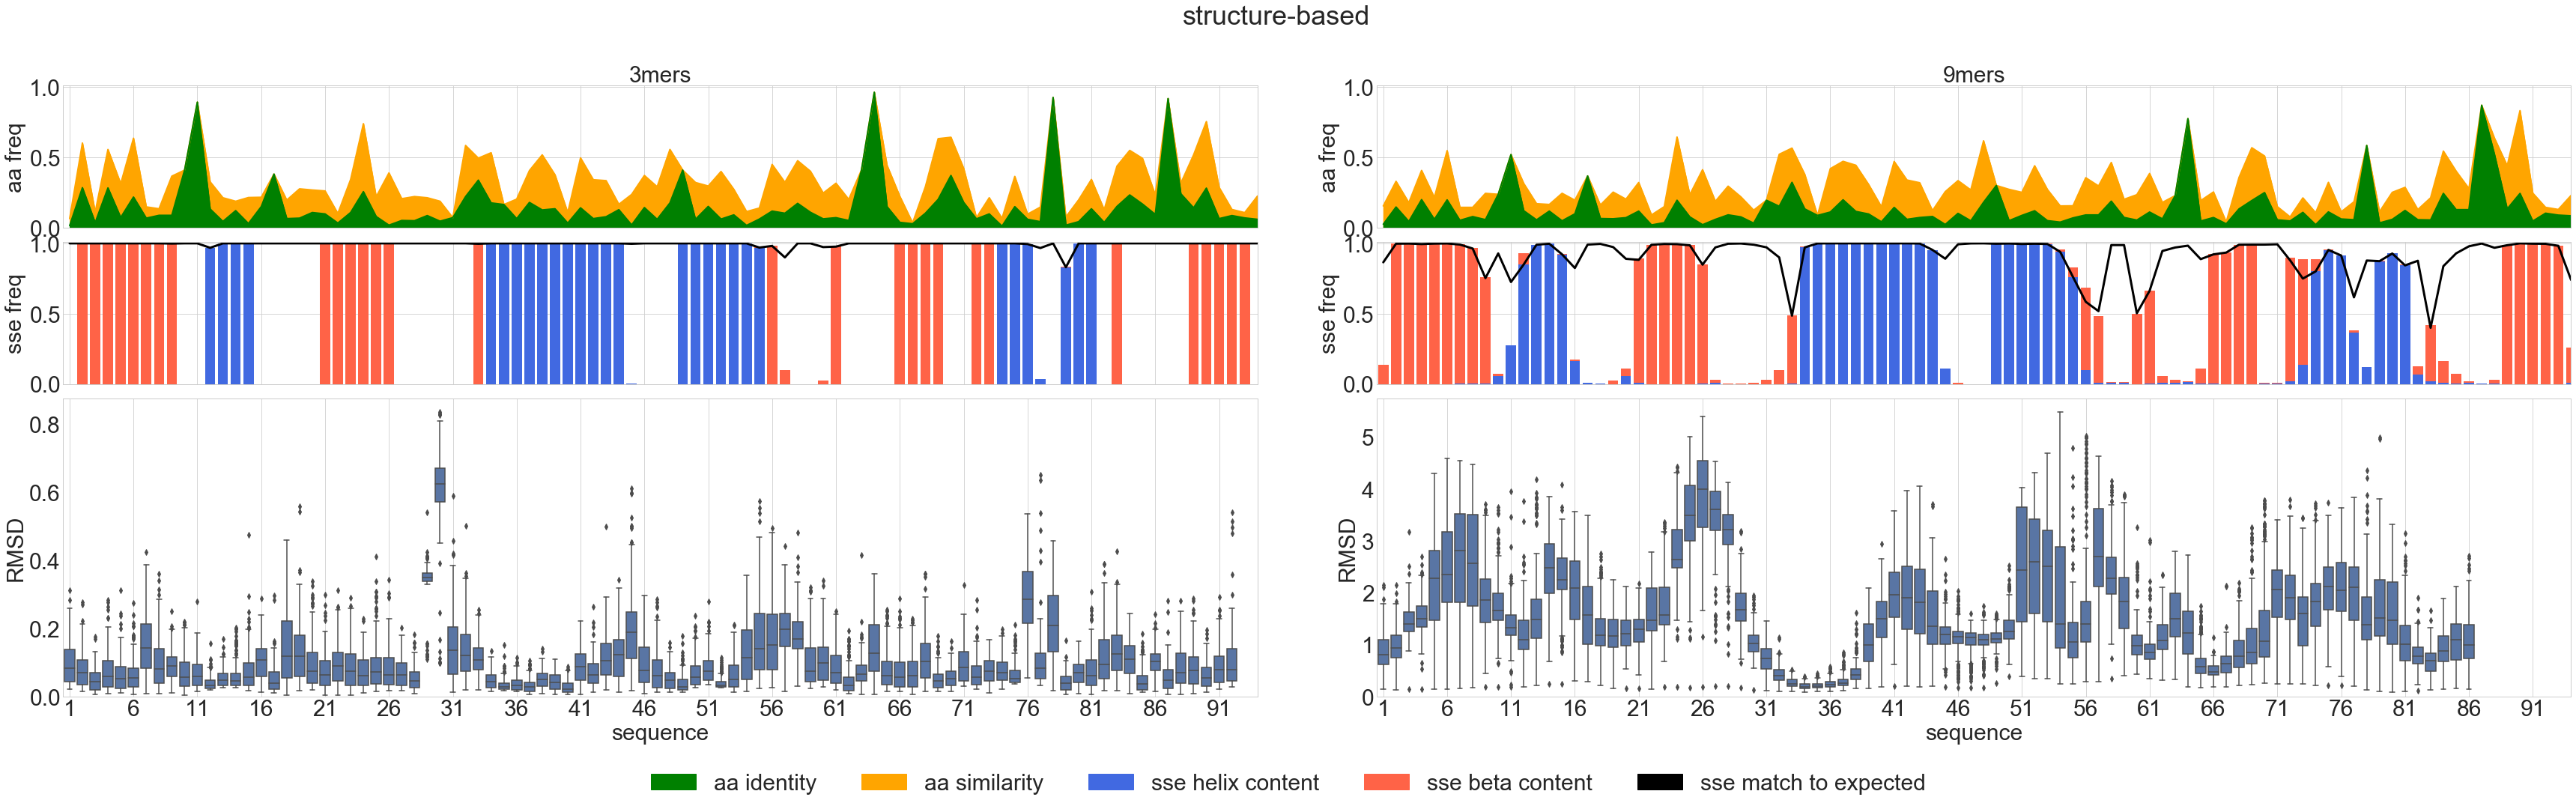

In [4]:
matplotlib.rcParams.update({'font.size': 30})
readme_utils.plot.plot_fragments( readme_utils.io.load_fragments( info ), info, base )

# Main data analysis:
## Recovery

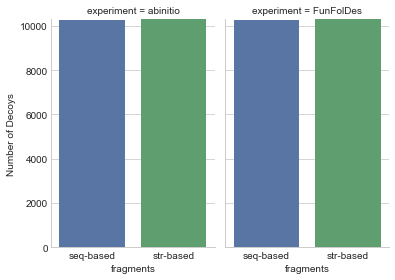

In [5]:
df = readme_utils.io.load_main_data( info, base )
readme_utils.plot.plot_coverage( df )

## FunFolDes vs. abinitio RMSD

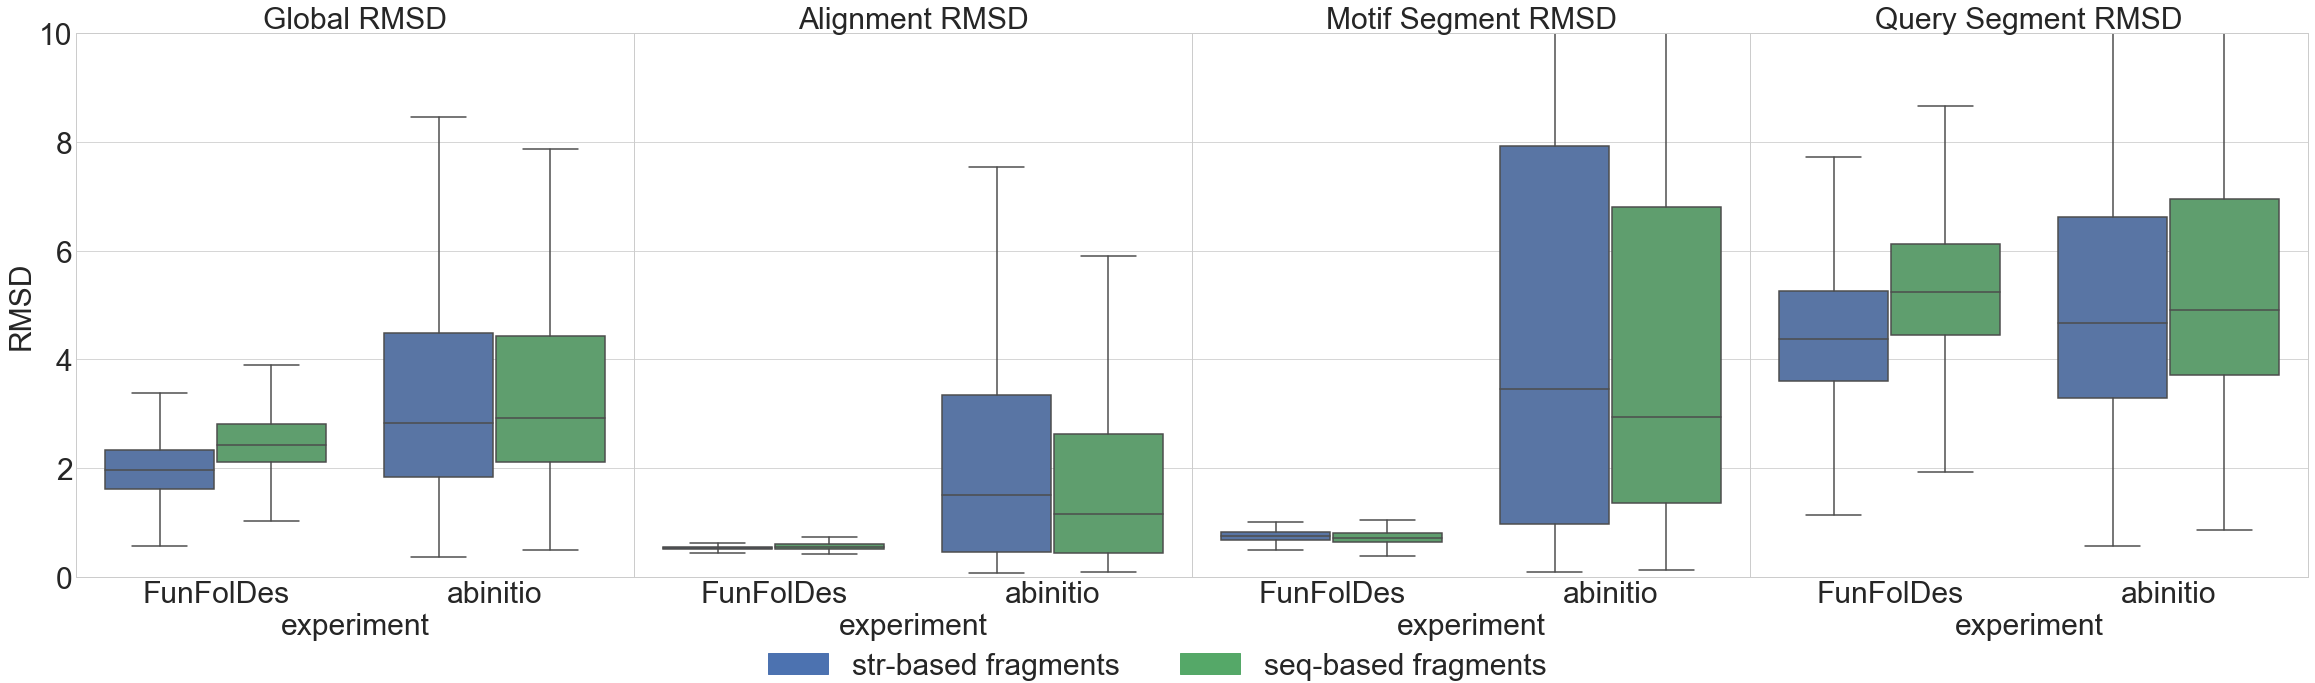

In [6]:
readme_utils.plot.plot_main_summary( df )

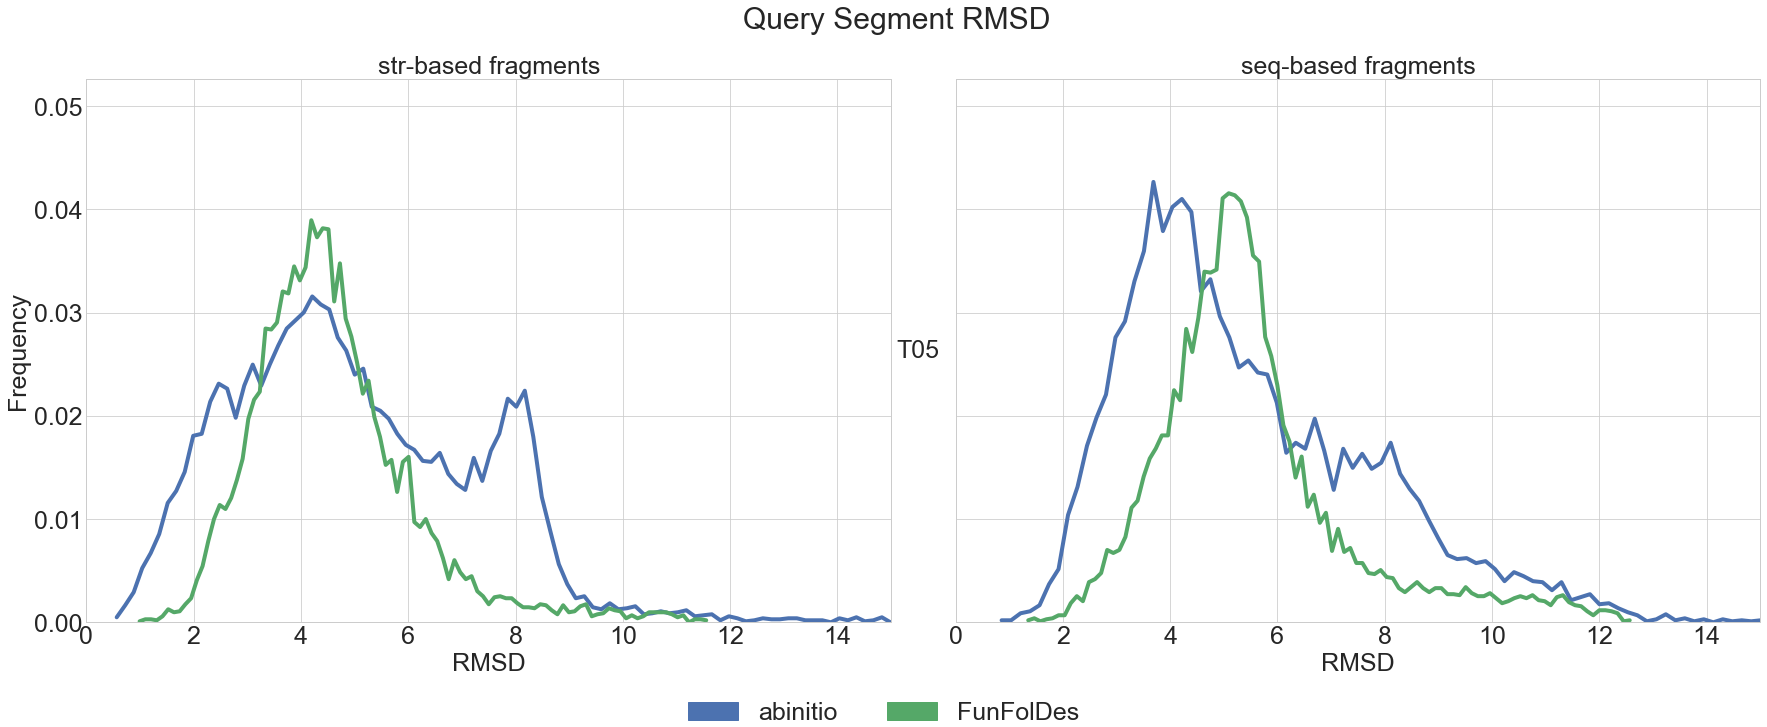

In [7]:
readme_utils.plot.plot_main_distributions( df, 15 )

## FunFolDes sequence retrieval

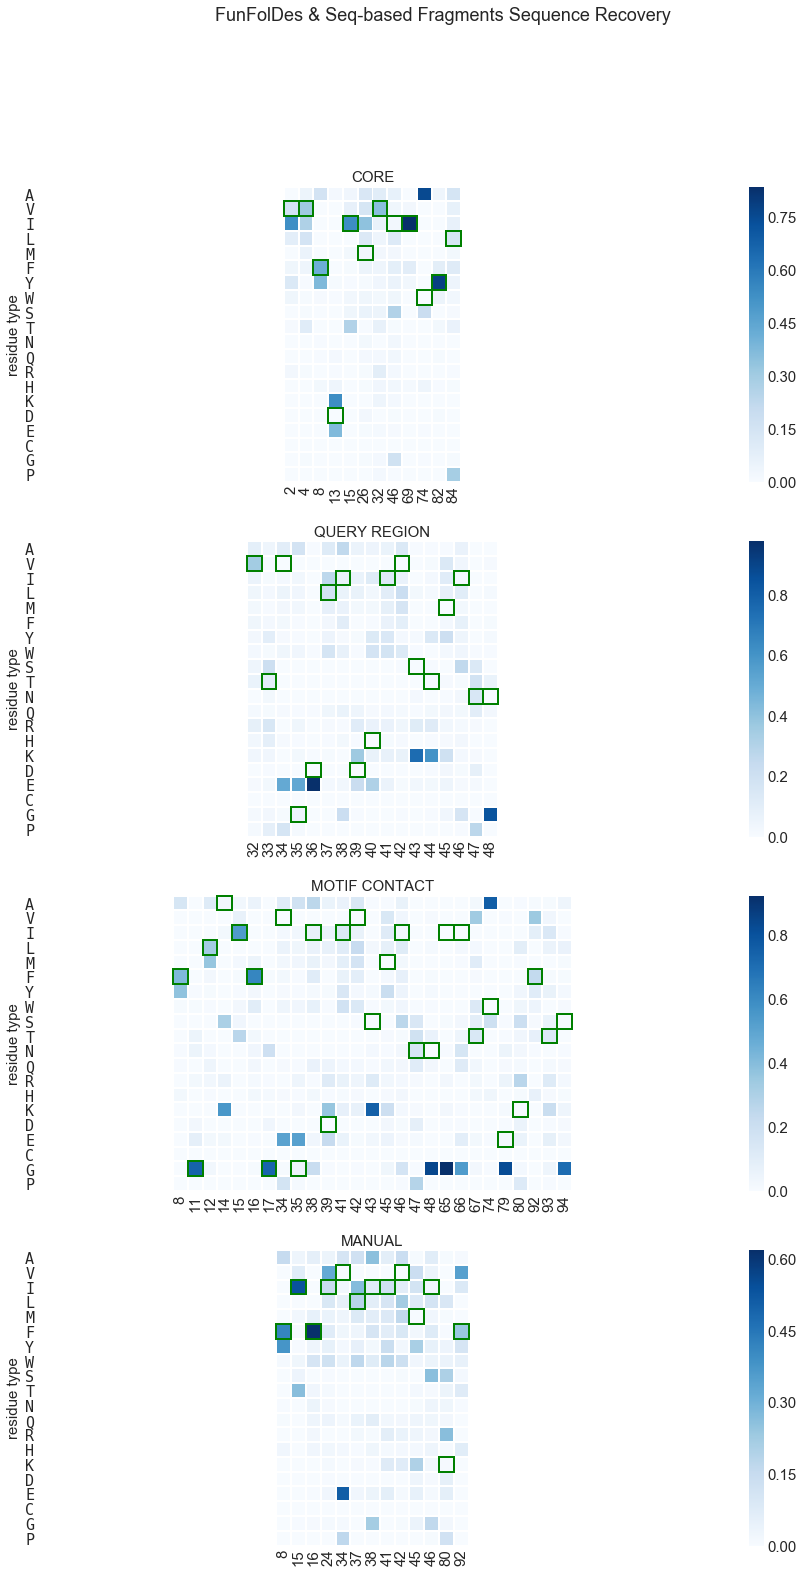

In [8]:
readme_utils.plot.plot_aa_heatmaps( df, info, base, 0.1 )

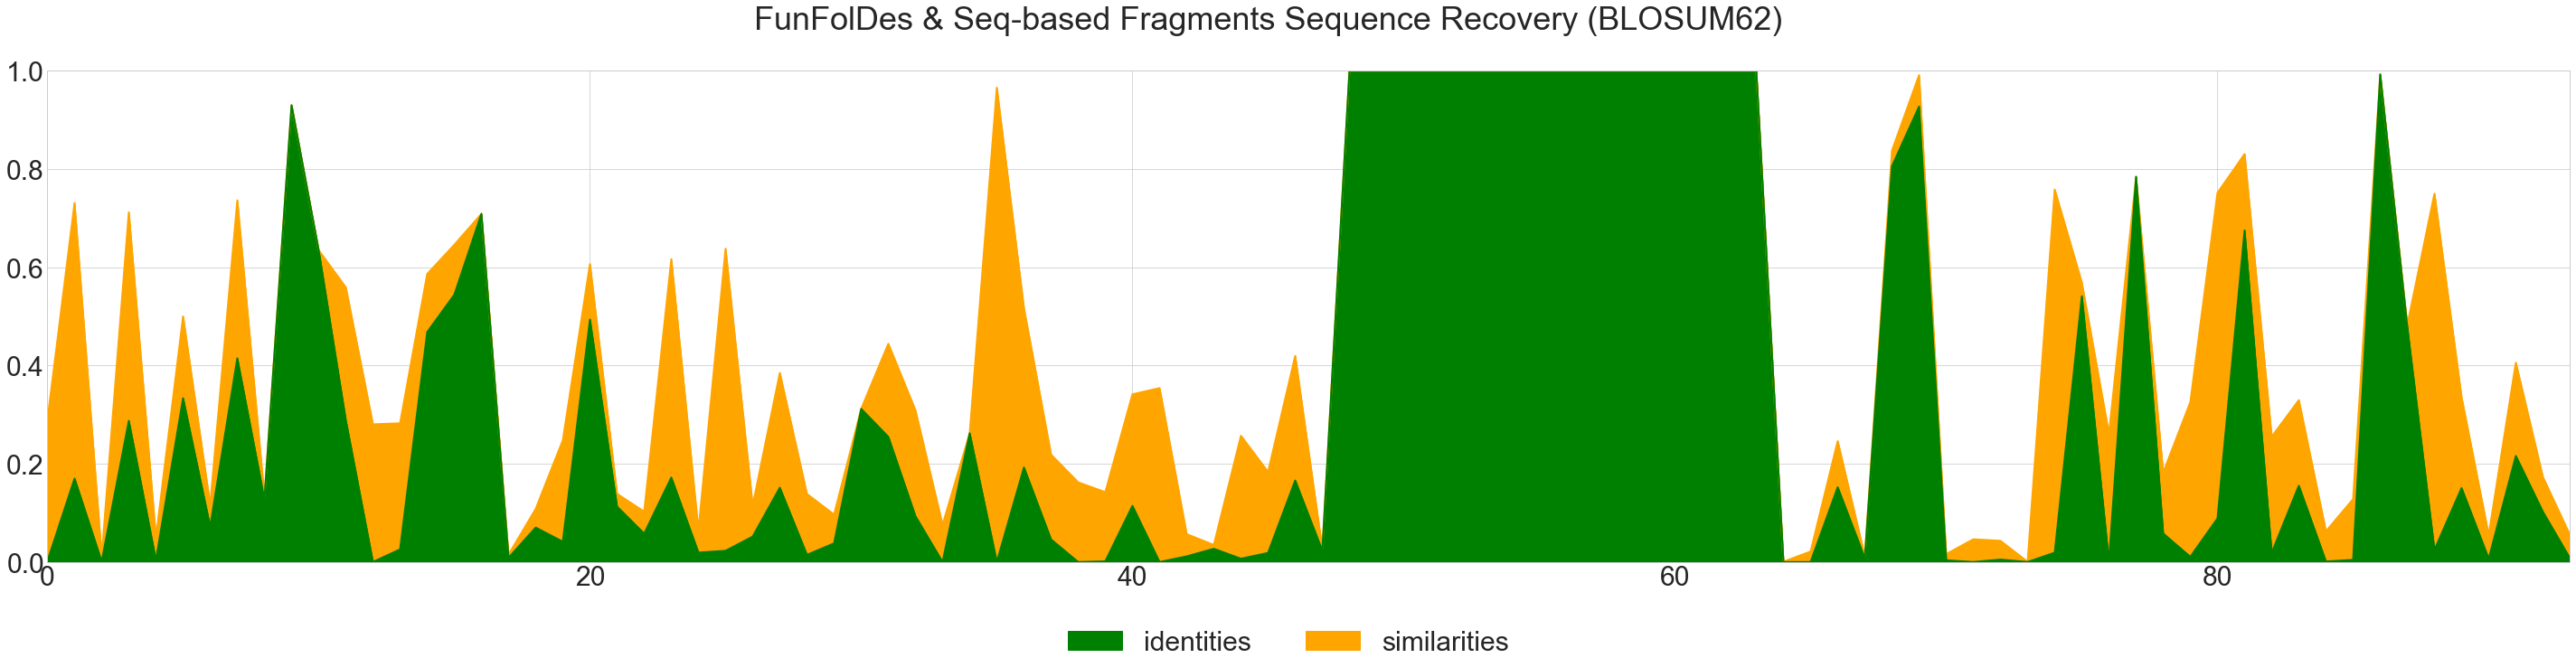

In [9]:
readme_utils.plot.plot_aa_similarities( df, info, base )

## HMM analysis
Check % of design recovered by using the HMM of the **template protein**.

A blue line defines, for the same filter conditions, the % recovery of all the protein of the CATH superfamily.

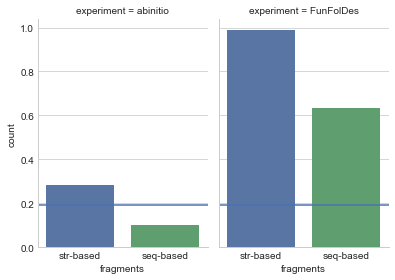

In [10]:
readme_utils.plot.plot_hmm(readme_utils.io.load_hmm_data( df, info, 0.5, 10 ))